# 10.4 Principle Component Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
states = pd.read_csv('USArrests.csv')
states.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
states.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
states.loc[:,['Murder','Assault','UrbanPop','Rape']].apply(lambda x: x.var())

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

As can be seen the variables have vastly different means and variances so it is important to scale them to a mean of 0 and a standard deviation of 1 so that (in this case) assault doesnt drive the principal components

In [11]:
#scaling the data

#importing scale() which will scale to a mean of 0 and an std dev of 1 by default
from sklearn.preprocessing import scale

#creating new, scaled df
statesNoLabel = states.loc[:,['Murder','Assault','UrbanPop','Rape']]
X = pd.DataFrame(scale(statesNoLabel), index=statesNoLabel.index, columns=statesNoLabel.columns)

In [12]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [13]:
#importing PCA from scikit-learn
from sklearn.decomposition import PCA

In [41]:
#getting PCA loadings
pca = PCA()
usarrests_loadings = pd.DataFrame(pca.fit(X).components_.T, index=statesNoLabel.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(usarrests_loadings)
usarrests_loadings.to_clipboard()

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


### note that above there are 4 distinct principal components, this is because in general there are $min(n-1,p)$ informative principal components in a data set with $n$ observations and $p$ variables

In [20]:
np.array(states.iloc[:,0])

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [22]:
#getting pca scores for each observation
usarrests_score = pd.DataFrame(pca.fit_transform(X), index = np.array(states.iloc[:,0]), columns=['PC1','PC2','PC3','PC4'])
display(usarrests_score)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


### plotting the biplot

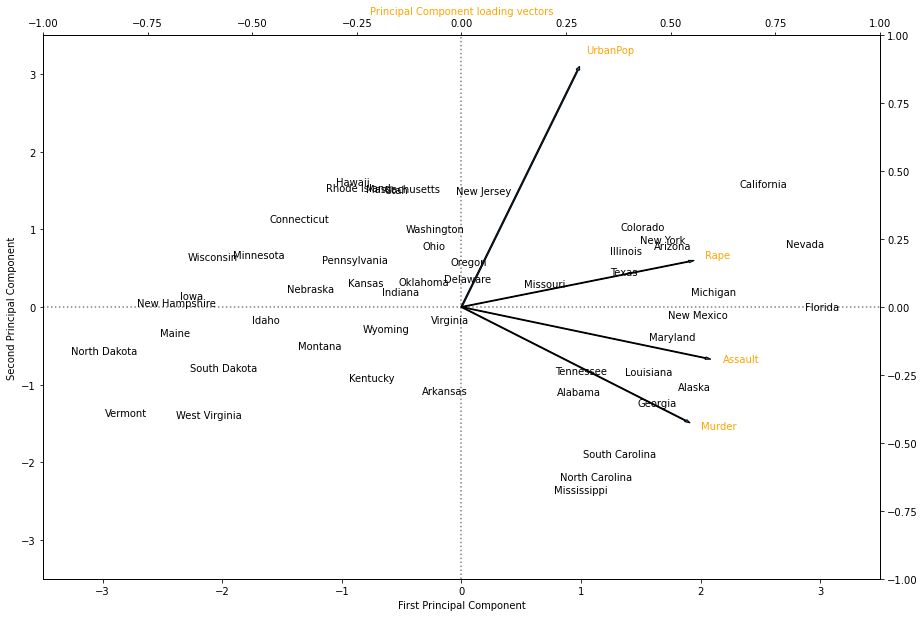

In [29]:
#setting the size
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2
#annotate is for plotting text, first arg is text, second in parens is coordinates(x,y)
for i in usarrests_score.index:
    ax1.annotate(i, (usarrests_score.PC1.loc[i],-usarrests_score.PC2.loc[i]), ha='center')
    
#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')

#setting axes labels
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in usarrests_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(usarrests_loadings.PC1.loc[i]*a,-usarrests_loadings.PC2.loc[i]*a),color='orange')
    
#plot vectors
ax2.arrow(0,0,usarrests_loadings.PC1[0], -usarrests_loadings.PC2[0], width=0.003)
ax2.arrow(0,0,usarrests_loadings.PC1[1], -usarrests_loadings.PC2[1], width=0.003)
ax2.arrow(0,0,usarrests_loadings.PC1[2], -usarrests_loadings.PC2[2], width=0.003)
ax2.arrow(0,0,usarrests_loadings.PC1[3], -usarrests_loadings.PC2[3], width=0.003);

In [30]:
#the proportion of variance explained by each PC
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [31]:
#getting the cumulative proportion of variance explained by each PC
np.cumsum(pca.explained_variance_ratio_)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

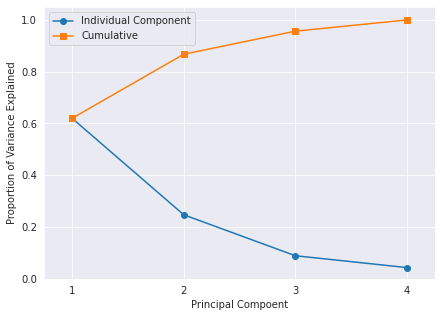

In [40]:
#plt style
sns.set_style('darkgrid')
#plotting a scree plot
plt.figure(figsize=(7,5))

#plotting individual component variance explained
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label="Individual Component")
#plotting cumulative components variance explained
plt.plot([1,2,3,4],np.cumsum(pca.explained_variance_ratio_),'-s', label='Cumulative')

#setting labels
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Compoent')
#setting x and y axis limits
plt.xlim(0.75, 4.25)
plt.ylim(0,1.05)
#setting tick marks
plt.xticks([1,2,3,4])
#showing legend
plt.legend(loc=2);
